# Training Loops

Resource: [TensorFlow Guide](https://www.tensorflow.org/guide/basic_training_loops)

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Solving a machine learning problem usually consists of the following steps:

- Obtain training data.
- Define the model.
- Define a loss function.
- Run through the training data, calculating loss from the ideal value
- Calculate gradients for that loss and use an optimizer to adjust the variables to fit the data.
- Evaluate your results.

Simple linear regression is the most basic of machine learning problems: Given $x$ and $y$, try to find the slope and offset of a line via a function $f(x) = x * W + b$, where has two variables: $W$ (weights) and $b$ (bias).

## Define the Problem

### Generate synthesized data

In [2]:
TRUE_W = 3.0
TRUE_B = 2.0

SAMPLE_SIZE = 200

x = tf.linspace(-2, 2, SAMPLE_SIZE)
x = tf.cast(x, tf.float32)

def f(x):
  return x * TRUE_W + TRUE_B

noise = tf.random.normal(shape = [SAMPLE_SIZE])

y = f(x) + noise

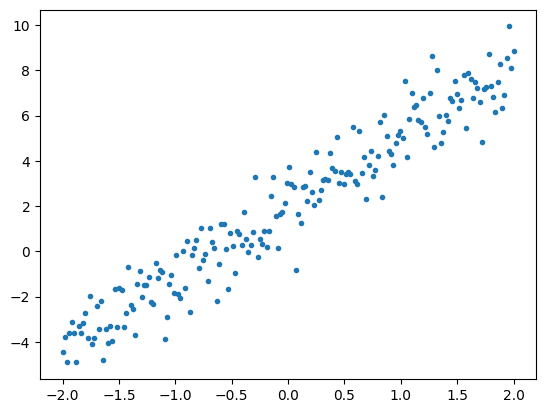

In [3]:
plt.plot(x, y, ".")
plt.show()

### Define the model

In [4]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

In [5]:
model = MyModel()

In [6]:
model.variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)

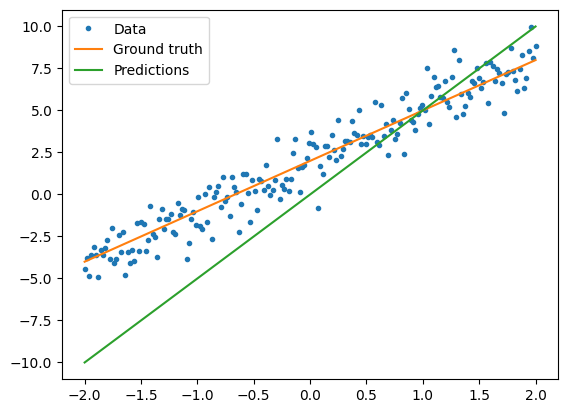

In [7]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

### Define a loss function

A loss function measures how well the output of a model for a given input matches the target output. The goal is to minimize this difference during training.

Define the standard L2 loss, also known as the "mean squared" error.

In [8]:
# This computes a single loss value for an entire batch
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

### Define a training loop

The training loop consists of repeatedly doing three tasks in order:

- Sending a batch of inputs through the model to generate outputs
- Calculating the loss by comparing the outputs to the output (or label)
- Using gradient tape to find the gradients
- Optimizing the variables with those gradients with an optimizer such as gradient descent

In [9]:
def train(model, x, y, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(y, model(x))

  dw, db = t.gradient(current_loss, [model.w, model.b])

  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

In [10]:
def report(model, loss):
  return f"W = {model.w.numpy():1.2f}, b = {model.b.numpy():1.2f}, loss={loss:2.5f}"

In [11]:
def training_loop(model, x, y, history, epochs = 20):
  for epoch in range(epochs):
    current_loss = train(model, x, y, learning_rate = 0.1)

    history["weights"].append(model.w.numpy())
    history["biases"].append(model.b.numpy())
    history["losses"].append(current_loss)

    if epoch % 5 == 0:
      print(f"Epoch {epoch:2d}:")
      print("    ", report(model, current_loss))

In [12]:
history = {"weights": [], "biases": [], "losses": []}
model = MyModel()
n_epochs = 50

current_loss = loss(y, model(x))

print(f"Starting:")
print("    ", report(model, current_loss))

training_loop(model, x, y, history, n_epochs)

Starting:
     W = 5.00, b = 0.00, loss=9.77656
Epoch  0:
     W = 4.49, b = 0.40, loss=9.77656
Epoch  5:
     W = 3.39, b = 1.47, loss=1.59614
Epoch 10:
     W = 3.16, b = 1.82, loss=1.01407
Epoch 15:
     W = 3.12, b = 1.94, loss=0.96442
Epoch 20:
     W = 3.11, b = 1.98, loss=0.95964
Epoch 25:
     W = 3.11, b = 1.99, loss=0.95916
Epoch 30:
     W = 3.10, b = 1.99, loss=0.95910
Epoch 35:
     W = 3.10, b = 1.99, loss=0.95910
Epoch 40:
     W = 3.10, b = 1.99, loss=0.95910
Epoch 45:
     W = 3.10, b = 1.99, loss=0.95910


In [13]:
print(TRUE_W, TRUE_B)
print(model.w.numpy(), model.b.numpy())

3.0 2.0
3.1045144 1.994672


Current loss: 0.959098
Current bias: 1.994672
Current weight: 3.104514


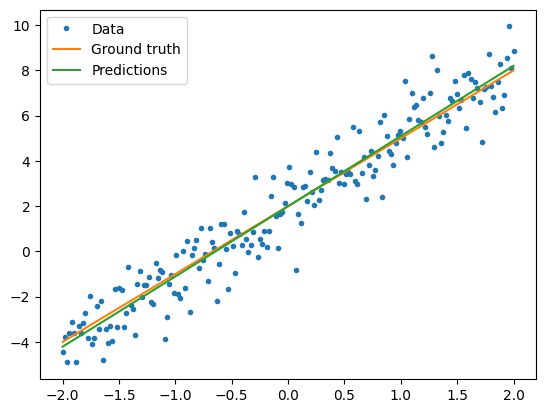

In [14]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()

print("Current loss: %1.6f" % loss(model(x), y).numpy())
print("Current bias: %1.6f" % model.b.numpy())
print("Current weight: %1.6f" % model.w.numpy())
plt.show()

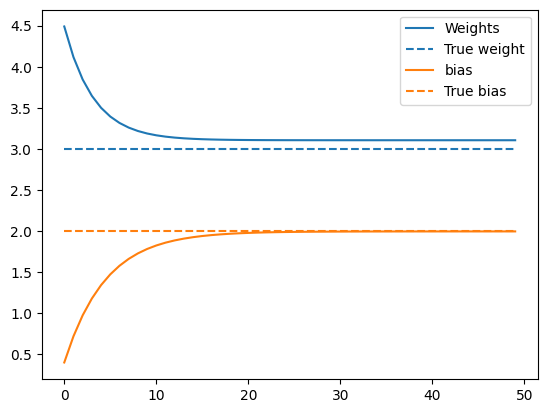

In [15]:
epochs  = range(n_epochs)

plt.plot(epochs, history["weights"], label='Weights', color=colors[0])
plt.plot(epochs, [TRUE_W] * len(epochs), '--',
         label = "True weight", color=colors[0])

plt.plot(epochs, history["biases"], label='bias', color=colors[1])
plt.plot(epochs, [TRUE_B] * len(epochs), "--",
         label="True bias", color=colors[1])

plt.legend()
plt.show()

## Training in Keras

### Define the equivalent model using Keras

In [16]:
class MyModelKeras(tf.keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.w = tf.Variable(5.)
    self.b = tf.Variable(0.)

  def call(self, x):
    return self.w * x + self.b

### Training a model using previous training loop function

In [17]:
keras_model = MyModelKeras()
history = {"weights": [], "biases": [], "losses": []}
n_epochs = 50

training_loop(keras_model, x, y, history, n_epochs)

Epoch  0:
     W = 4.49, b = 0.40, loss=9.77656
Epoch  5:
     W = 3.39, b = 1.47, loss=1.59614
Epoch 10:
     W = 3.16, b = 1.82, loss=1.01407
Epoch 15:
     W = 3.12, b = 1.94, loss=0.96442
Epoch 20:
     W = 3.11, b = 1.98, loss=0.95964
Epoch 25:
     W = 3.11, b = 1.99, loss=0.95916
Epoch 30:
     W = 3.10, b = 1.99, loss=0.95910
Epoch 35:
     W = 3.10, b = 1.99, loss=0.95910
Epoch 40:
     W = 3.10, b = 1.99, loss=0.95910
Epoch 45:
     W = 3.10, b = 1.99, loss=0.95910


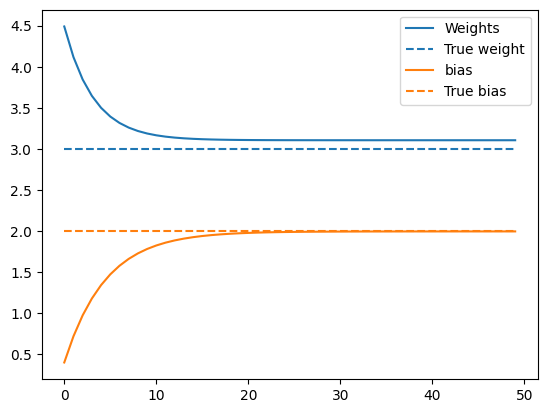

In [18]:
epochs  = range(n_epochs)

plt.plot(epochs, history["weights"], label='Weights', color=colors[0])
plt.plot(epochs, [TRUE_W] * len(epochs), '--',
         label = "True weight", color=colors[0])

plt.plot(epochs, history["biases"], label='bias', color=colors[1])
plt.plot(epochs, [TRUE_B] * len(epochs), "--",
         label="True bias", color=colors[1])

plt.legend()
plt.show()

### Training a model using Keras fit() method

In [19]:
keras_model = MyModelKeras()
keras_model.compile(
    run_eagerly = False,
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1),
    loss = tf.keras.losses.mean_squared_error
)

Keras fit expects batched data or a complete dataset as a NumPy array. NumPy arrays are chopped into batches and default to a batch size of 32.

In [20]:
keras_model.fit(x, y, epochs = n_epochs, batch_size = 1000)

Epoch 1/50
1/1 [==============================] - 1s 673ms/step - loss: 9.7766
Epoch 2/50
1/1 [==============================] - 0s 26ms/step - loss: 6.0887
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 3.9678
Epoch 4/50
1/1 [==============================] - 0s 18ms/step - loss: 2.7383
Epoch 5/50
1/1 [==============================] - 0s 27ms/step - loss: 2.0197
Epoch 6/50
1/1 [==============================] - 0s 15ms/step - loss: 1.5961
Epoch 7/50
1/1 [==============================] - 0s 16ms/step - loss: 1.3445
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 1.1939
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 1.1030
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 1.0478
Epoch 11/50
1/1 [==============================] - 0s 16ms/step - loss: 1.0141
Epoch 12/50
1/1 [==============================] - 0s 13ms/step - loss: 0.9933
Epoch 13/50
1/1 [==============================] - 0s 9ms/st